In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os

# Define file paths
file_paths = [
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/机器人.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/半导体.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/半导体材料.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/半导体设备.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/人工智能.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/自动化设备.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/计算机.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/软件开发.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/电子.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/通信设备.csv'
]

# Create a dictionary to store all processed dataframes
data_dict = {}

for file_path in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Make a copy of the dataframe for processing
    processed_df = df.copy()
    
    # Convert trade_date to datetime format
    processed_df['trade_date'] = pd.to_datetime(processed_df['trade_date'], format='%Y%m%d')
    
    # Extract year, month, and day
    processed_df['year'] = processed_df['trade_date'].dt.year
    processed_df['month'] = processed_df['trade_date'].dt.month
    processed_df['day'] = processed_df['trade_date'].dt.day
    
    # Get the industry name from the filename
    industry_name = os.path.basename(file_path).replace('.csv', '')
    
    # Store the processed dataframe in the dictionary
    data_dict[industry_name] = processed_df

# Verify the first few rows of one dataframe to check processing
print("Sample processed data:")
print(data_dict['机器人'].head())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ash/Desktop/毕业/writer/data/申万行业指数/人工智能.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os

# Define file paths
file_paths = [
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/机器人.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/半导体.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/半导体材料.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/半导体设备.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/人工智能.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/自动化设备.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/计算机.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/软件开发.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/电子.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/通信设备.csv'
]

# Create a dictionary to store all processed dataframes
data_dict = {}

for file_path in file_paths:
    try:
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue
            
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Make a copy of the dataframe for processing
        processed_df = df.copy()
        
        # Convert trade_date to datetime format
        processed_df['trade_date'] = pd.to_datetime(processed_df['trade_date'], format='%Y%m%d')
        
        # Extract year, month, and day
        processed_df['year'] = processed_df['trade_date'].dt.year
        processed_df['month'] = processed_df['trade_date'].dt.month
        processed_df['day'] = processed_df['trade_date'].dt.day
        
        # Get the industry name from the filename
        industry_name = os.path.basename(file_path).replace('.csv', '')
        
        # Store the processed dataframe in the dictionary
        data_dict[industry_name] = processed_df
        
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        continue

# Verify the processed data
if data_dict:
    print("\nSuccessfully processed files:")
    for name in data_dict.keys():
        print(f"- {name}")
    
    # Show sample data from first available file
    first_key = next(iter(data_dict))
    print(f"\nSample data from {first_key}:")
    print(data_dict[first_key].head())
else:
    print("No files were successfully processed.")


File not found: /Users/ash/Desktop/毕业/writer/data/申万行业指数/人工智能.csv

Successfully processed files:
- 机器人
- 半导体
- 半导体材料
- 半导体设备
- 自动化设备
- 计算机
- 软件开发
- 电子
- 通信设备

Sample data from 机器人:
  name trade_date     pe    pb   float_mv      total_mv  year  month  day
0  机器人 2024-01-02  66.91  3.67  7515859.0  1.428371e+07  2024      1    2
1  机器人 2024-01-03  65.59  3.59  7370099.0  1.403007e+07  2024      1    3
2  机器人 2024-01-04  64.88  3.55  7255730.0  1.384978e+07  2024      1    4
3  机器人 2024-01-05  63.57  3.48  7117365.0  1.357488e+07  2024      1    5
4  机器人 2024-01-08  61.42  3.36  6872370.0  1.310179e+07  2024      1    8


In [3]:
import numpy as np
from matplotlib.font_manager import FontProperties

# Set up the plot
font_path = "/Library/Fonts/SimHei.ttf"
font_prop = FontProperties(fname=font_path)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each industry's total_mv trend
for industry_name, df in data_dict.items():
    if 'total_mv' in df.columns:
        ax.plot(df['trade_date'], df['total_mv'], label=industry_name)

# Format the plot
ax.set_xlabel('交易日期', fontproperties=font_prop)
ax.set_ylabel('总市值 (万元)', fontproperties=font_prop)
ax.set_title('申万行业指数总市值趋势', fontproperties=font_prop)
ax.legend(prop=font_prop)
ax.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure the output directory exists
output_dir = "/Users/ash/Desktop/毕业/writer/output/AI25/image"
os.makedirs(output_dir, exist_ok=True)

# Save the figure
output_path = os.path.join(output_dir, "申万行业指数总市值趋势.png")
fig.savefig(output_path, bbox_inches='tight', dpi=300)
plt.close()

print(f"Plot saved successfully at: {output_path}")


Plot saved successfully at: /Users/ash/Desktop/毕业/writer/output/AI25/image/申万行业指数总市值趋势.png


Plot exists at: /Users/ash/Desktop/毕业/writer/output/AI25/image/申万行业指数总市值趋势.png
File size: 448.47 KB


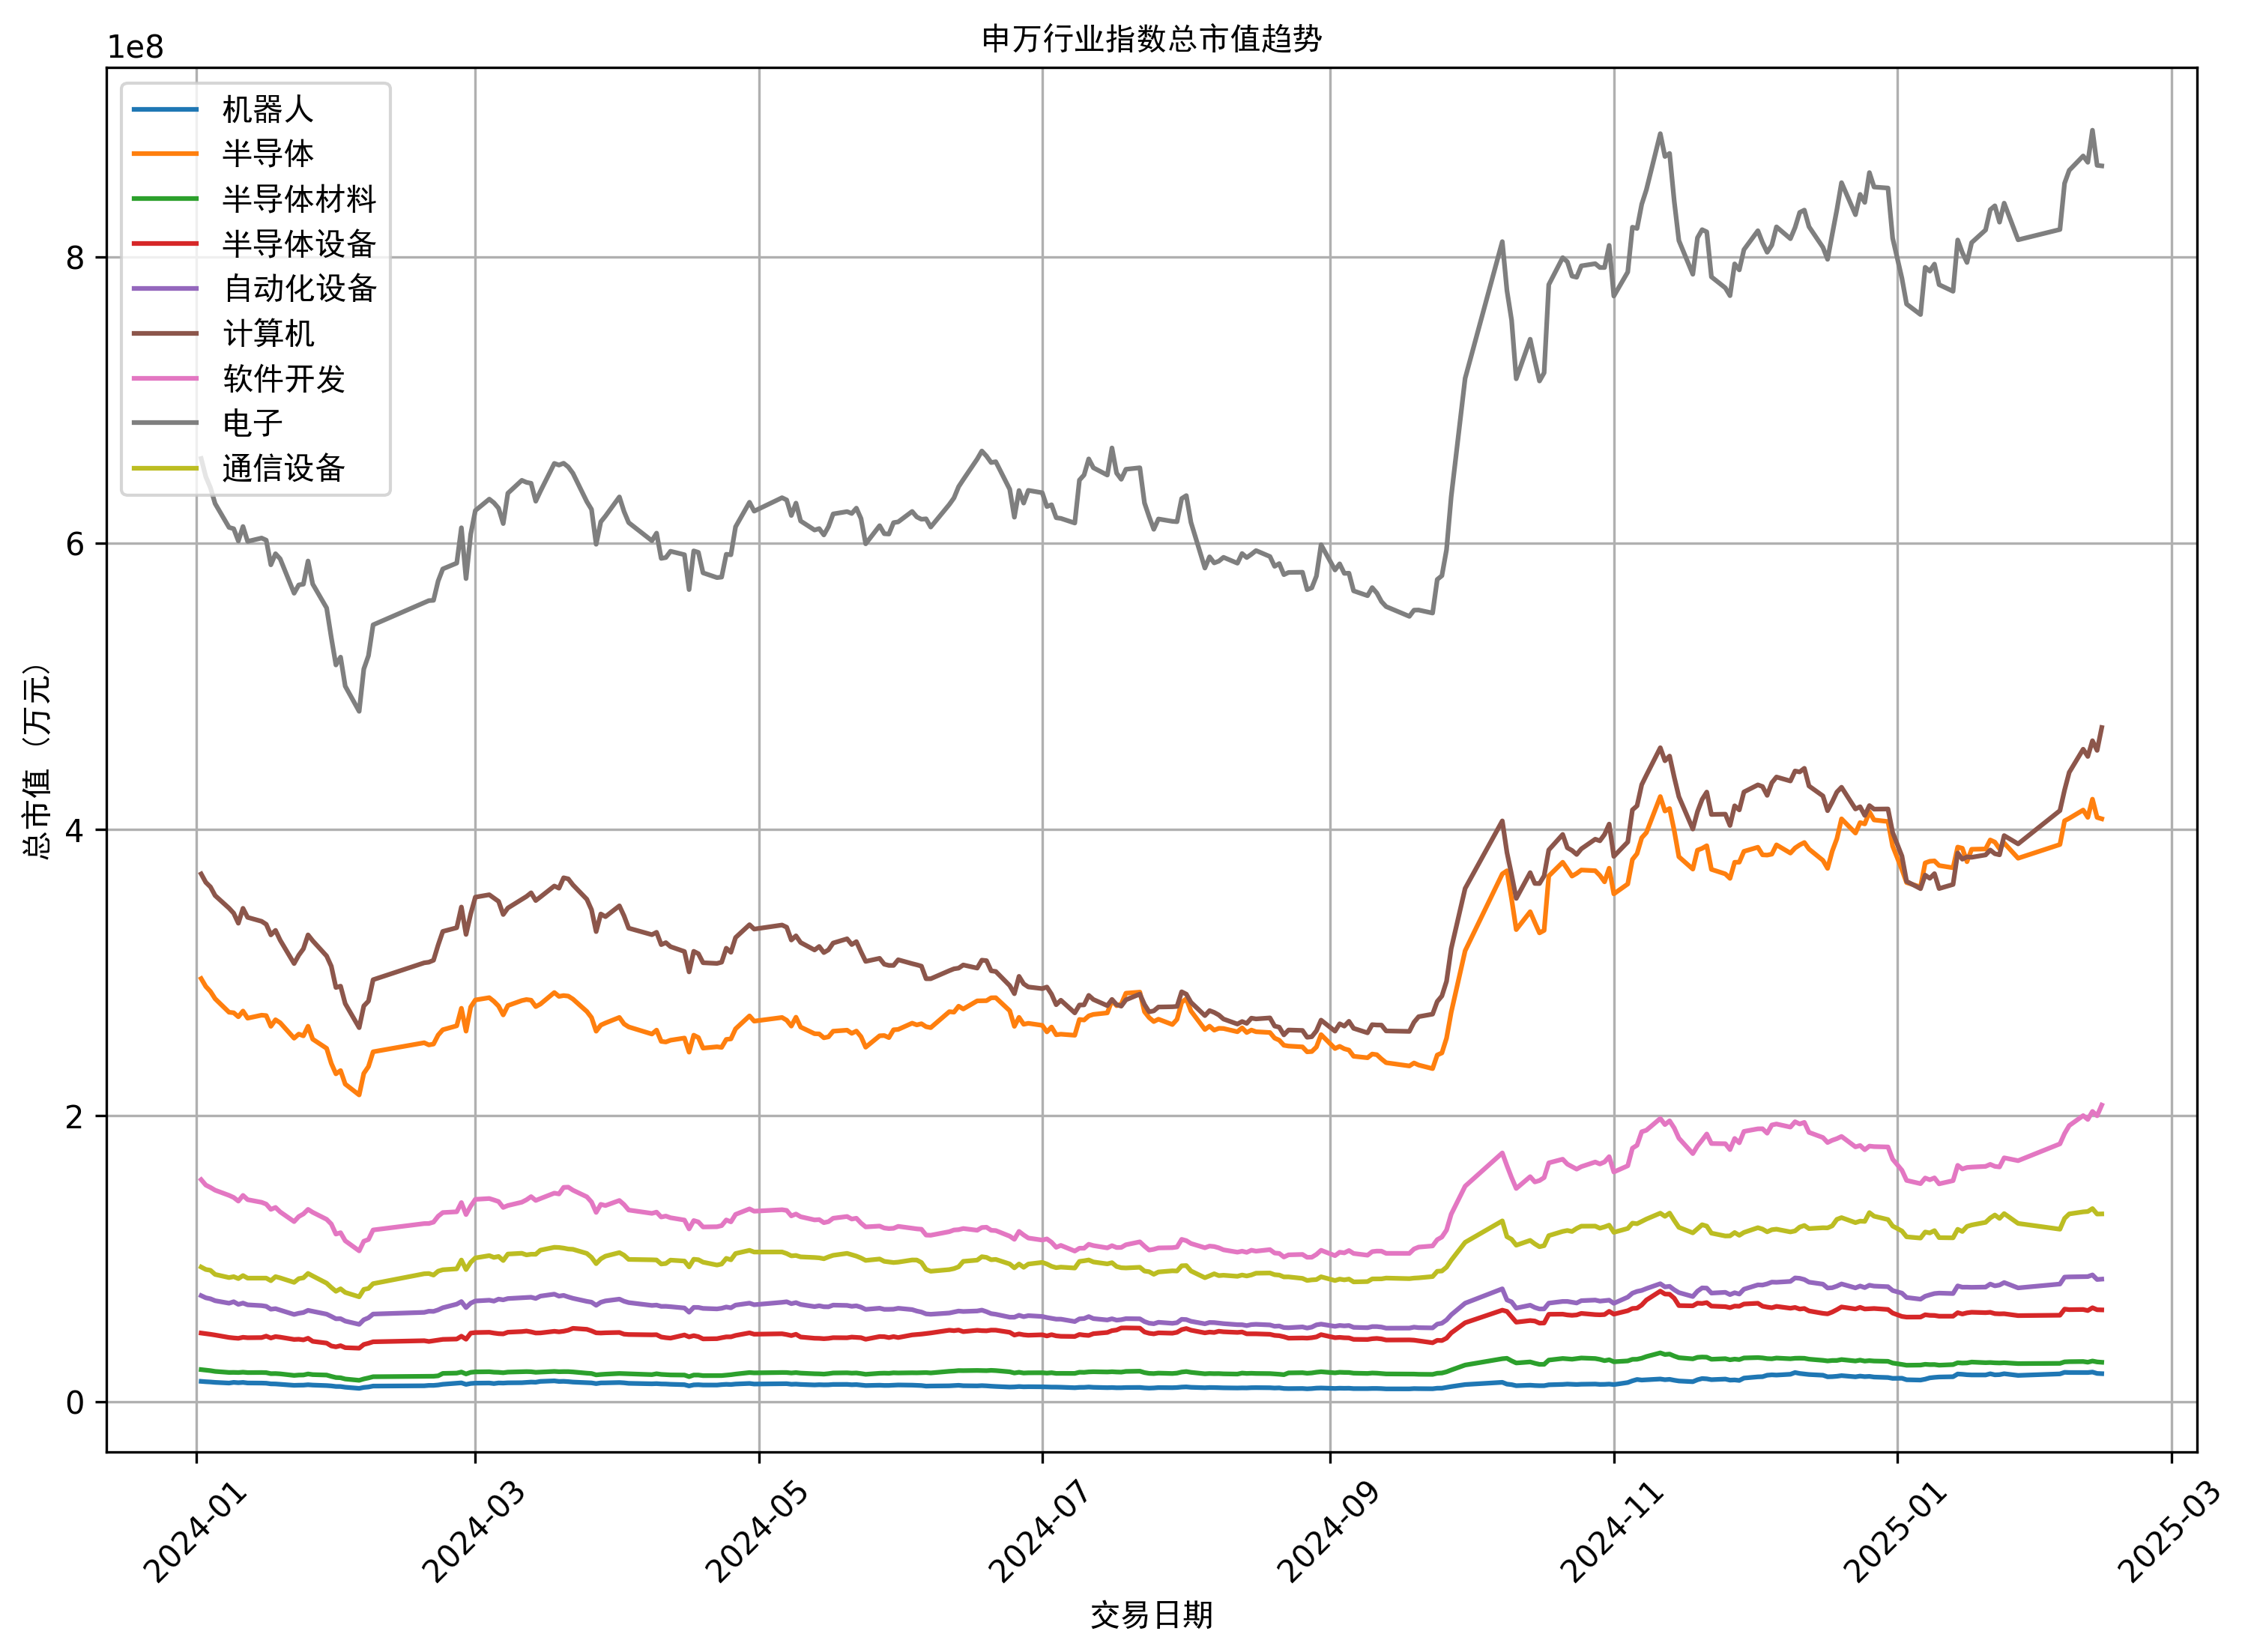

In [4]:
# Verify the saved plot exists and show its info
import os
output_path = "/Users/ash/Desktop/毕业/writer/output/AI25/image/申万行业指数总市值趋势.png"
if os.path.exists(output_path):
    print(f"Plot exists at: {output_path}")
    print(f"File size: {os.path.getsize(output_path)/1024:.2f} KB")
    
    # Optionally display the saved plot
    from IPython.display import Image
    display(Image(filename=output_path))
else:
    print("Plot not found at the specified location.")
